<a href="https://colab.research.google.com/github/baiascience/metricas_erro_forecast/blob/main/A01_Como_o_devido_entendimento_destes_3_KPIs_podem_otimizar_seu_estoque%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---

<p align=left>
<img src="https://github.com/baiascience/baia_science_main/blob/main/baia-science_black.png?raw=true" width="20%"></p>
by: Matheus Baia

---
---

<br>


# A01 - Como o devido entendimento destes 3 KPIs podem otimizar seu estoque?

<p align=center>
<img src="https://image.freepik.com/free-vector/sales-reps-managers-analyze-sales-pipeline-sales-pipeline-management-representation-sales-prospects-customer-prospects-lifecycle-concept-illustration_335657-2338.jpg" width="60%"></p>


Ao final deste artigo você será capaz de:

*   Conhecer os três KPIs básicos de acurácia de demanda;
*   Conhecer quais são suas vantangens e desvantagens;
*   Entender os porquês das deficiências de cada KPI;
*   Ser capaz de tomar decisões baseadas em fatos estatísticos.

Para te auxiliar na compreensão, preparei algumas demonstrações em Python. Se você não compreende a linguagem, sem problemas. Conseguirá entender o artigo mesmo assim.

---
### 1. Erro de Forecast

<br>

Uma das principais tarefas dos profissionais de supply chain é a busca pela obtenção de bons resultados de acurácia, ou seja, uma busca constante pela redução do erro, compreendido pela diferença entre a demanda realizada em um mês $t$ e o forecast previsto para o mesmo mês $t$. Matematicamente, podemos dizer que buscamos reduzir o valor de $e_t$ da equação logo abaixo:

$$e_t = d_t - f_t$$

Onde $e_t$ é o erro para o período $t$

É claro que há vários KPIs (Key Performance Indicators) que nos ajudam a compreender se estamos indo bem ou mal ao realizar as nossas previsões em relação milhares de materiais e mês a mês, semana a semana, o tal $f_t$ representa esta previsão, é a nossa aposta, e para isto utilizamos modelos de forecast como Naïve, média móvel, suavização exponencial ou modelos de machine learning como o XGBoost.

Infelizmente, este trabalho de redução de $e_t$ não é uma tarefa fácil e pode depender de experimentação e lógicas de classificação/agrupamento dos materiais que desejamos prever a demanda. Isto ocorre porque enquanto uma medida tapa um buraco, destapa outro. Enquanto beneficia algumas características intrínsecas de um material, prejudica a de outro.

Podemos enxergar esses problemas a partir de dois principais personagens. Precisamos entender a diferença entre **viés** e **precisão**

<br>

> **Viés**: Representa o erro da média histórica. A partir disto podemos determinar se o nosso forecast errou majoritariamente para cima ou para baixo. O viés nos dá a direção do erro.

> **Precisão**: Se você já viu uma curva normal, será fácil de entender. A precisão determina o quão "espalhado" está o erro. Cometemos muitos erros pequenos (melhor) ou cometemos tantos erros pequenos como grandes (o erro variou, está "espalhado")? A precisão nos dará uma ideia da variação de magnitude dos erros, mas não nos conta nada a respeito da direção média dos erros.

<br>

A imagem abaixo resume bem estes conceitos:
Fica claro que para termos um resultado acurado devemos ter uma estimativa **sem viés e precisa**.


<p align='center'> 
<img src="https://www.researchgate.net/profile/Antonio-Martinez-59/publication/265842871/figure/fig1/AS:669537842241549@1536641669482/Figura-5-Ilustracao-sobre-os-conceitos-de-vies-precisao-e-acuracia.png" width="60%"></p>

<br>


Passando o conceito de viés ($bias$) para linguagem matemática, temos:

 $$ bias =  \frac{1}{n} \sum_{t=0}^n e_t $$

  $$ bias =  \frac{1}{n} \sum_{t=0}^n (d_t - f_t) $$



Perceba a partir da equação que se somarmos mais erros mensais negativos (forecast acima do realmente realizado, $f_t$ > $d_t$) teremos um $bias$ negativo, portanto, indicando a direção média do erro, já podemos afirmar que há algo de errado com o modelo que propôs $f_t$ (spoiler: acontecerá com enorme frequência). Faz todo sentido matemático até aqui, certo?

---

### MAPE

O MAPE (Mean Absolute Percentage Error) é um dos KPIs mais utilizados e é dado pela soma dos erros absolutos dividido pela demanda para cada período separadamente.

$$ MAPE = \frac{1}{n} \sum_{}{\frac{|e_t|}{d_t}} $$

É importante notar a inclinação dessa medida em sofrer maiores impactos em um período de maior erro e **menor demanda**. Este KPI, portanto, já apresenta um problema grave, uma vez que o simples fato da demanda passar por períodos de baixa cause uma grande interferência no KPI.

---

### MAE

O MAE (Mean Absolute Error) é considerado um bom KPI para medir acurácia. Entende-se pela média do erro absoluto. Retira-se a demanda do período.

$$ MAE = \frac{1}{n} \sum_{}{|e_t|} $$

Porém, facilmente notamos um problema. Como diferenciar um MAE bom de um ruim? Digamos que temos um $MAE = 10$, se a demanda média mensal é 10000 podemos comemorar, tivemos uma ótima acurácia. Se a demanda média mensal do material é 1, tivemos um péssimo resultado. 

Para resolver este problema podemos incluir o somatório da demanda e adquirir o MAE (%).

$$ MAE = \frac{\frac{1}{n}\sum_{}{|e_t|}}{\frac{1}{n}\sum_{}{d_t}} = \frac{\sum_{}{|e_t|}}{\sum_{}{d_t}}  $$ 



Observe que enquanto o MAPE divide cada parcela da soma. O MAE soma e somente depois realiza a divisão. Isto faz toda a diferença. Talvez não notada pela maioria dos estudantes. É muito importante uma conversa prévia entre o cliente e fornecedor sobre a medida utilizada para medir acurácia, assim poderão comparar bananas com bananas.

--- 
### RMSE

O RMSE (Root Mean Square Error) é bastante útil e definido por:    


$$ RMSE = \sqrt{\frac{1}{n} \sum_{}{e_t^2}} $$

Como a demanda não entra separada por período, podemos definir a nível percentual realizando a divisão pela média da demanda, como fizemos com o MAE.

$$ RMSE = \frac{\sqrt{\frac{1}{n} \sum_{}{e_t^2}}}{\frac{1}{n}\sum_{}{d_t}} $$

Devido a complexidade computacional e dificuldade de manipulação para extrair informação de grandes séries temporais, muitos algoritmos optam pela medida correlacionada MSE (Mean Square error). Porém, como não podemos correlacionar proporcionalmente com a demanda (pois teríamos $e_t^2/d_t$), esta medida não será interessante para um modelo de forecast.

$$ MSE = \frac{1}{n} \sum_{}{e_t^2} $$

### Comparando como cada KPI reage ao erro.

O RMSE não trata o erro da mesma forma que o MAE. Como o erro está elevado ao quadrado, um erro maior contribui mais no RMSE do que no MAE. Aqui a matemática pede licença e diz que isto só é verdade para $e_t$>1, mas  isto é verdade na maioria dos casos em supply chain.

Para ter uma ideia disto vamos comparar duas series de erro, cuja única diferença está no último período. Assim podemos comparar a reação de cada medida de erro a esta diferença. 


Irei realizar comentários no código Python para facilitar o entendimento.

In [ ]:
#@title

#Declarando demanda
demanda = [10,12,14,8,9,5,8,10,12,11,10,15]

#Declarando exemplo de forecast 1
forecast1 = [12,14,15,10,7,4,5,8,12,14,13,8]

#Declarando exemplo de forecast 2
forecast2 = [12,14,15,10,7,4,5,8,12,14,13,9]

In [ ]:
#@title

#importando bibliotecas do python
import pandas as pd
import numpy as np

In [ ]:
#@title

#Montando tabela de trabalho
tabela = pd.DataFrame({'Demanda':demanda,'Forecast 1':forecast1,'Forecast 2':forecast2})
tabela.index.name = 'Periodo'

In [ ]:
#@title

#Calculando os erros periodo a periodo.
tabela['erro 1'] = tabela['Forecast 1'] - tabela['Demanda']
tabela['erro 2'] = tabela['Forecast 2'] - tabela['Demanda']

É importante interpretar a tabela corretamente. Precisamos salientar que estamos olhando o tempo todo para o passado, ou não estaríamos medindo erro. Portanto, no **período 9** tivemos uma demanda de 11 unidades, o forecast (que é realizado um ou mais meses antes) foi de 14 unidades. Portanto tivemos um erro de 3 unidades para o **período 9**.

Neste momento não importa o modelo do forecast, estamos focados em medir o impacto nos KPIs que estamos discutindo.

Observe atentamente que a única diferença entre os forecasts se dá no período 11. O erro do Forecast 2 é uma unidade menor. O erro saiu de -7 para -6, "reduziu" ao se aproximar de zero.


In [ ]:
tabela

,Demanda,Forecast 1,Forecast 2,erro 1,erro 2
Periodo,,,,,
0,10,12,12,2,2
1,12,14,14,2,2
2,14,15,15,1,1
3,8,10,10,2,2
4,9,7,7,-2,-2
5,5,4,4,-1,-1
6,8,5,5,-3,-3
7,10,8,8,-2,-2
8,12,12,12,0,0


In [ ]:
#@title

#importante bibliotecas que possuem funções prontas para o nosso exercício.
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#definindo o MAPE separadamente
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
#@title

#Tomando as medidas para o forecast 1
RMSE_1 = np.sqrt( mean_squared_error(tabela['Demanda'],tabela['Forecast 1']) )
MAE_1 = mean_absolute_error(tabela['Demanda'],tabela['Forecast 1'])
#Tomando as medidas para o forecast 2
RMSE_2 = np.sqrt( mean_squared_error(tabela['Demanda'],tabela['Forecast 2']) )
MAE_2 = mean_absolute_error(tabela['Demanda'],tabela['Forecast 2'])

In [ ]:
#Resultados para o forecast 1
print( 'MAE para o forecast 1:', round(MAE_1,2),'\n''RMSE para o forecast 1:',round(RMSE_1,2))

MAE para o forecast 1: 2.33 
RMSE para o forecast 1: 2.86


In [ ]:
#Resultados par ao forecast 2
print( 'MAE para o forecast 2:', round(MAE_2,2),'\n''RMSE para o forecast 2:',round(RMSE_2,2))

MAE para o forecast 2: 2.25 
RMSE para o forecast 2: 2.66


In [ ]:
#Impacto para as medidas de erro
print('Redução do MAE:', -round(((MAE_2/MAE_1)-1)*100,2),'%','\n''Redução do RMSE:',-round(((RMSE_2/RMSE_1)-1)*100,2),'%')

Redução do MAE: 3.57 % 
Redução do RMSE: 6.87 %


No período 11 tivemos um erro menor em termos de unidades. De -7 para -6 (nos aproximamos de zero). Como esperado, as duas medidas tiveram resultados diferentes, mas não só isso. As medidas de erro sofreram reduções diferentes quando submetidas ao mesmo erro. O MAE sofreu uma redução de 3,57%, enquanto que o RMSE reduziu 6,87%. Isto mostra que a amplitude do erro tem uma importância muito maior para o RMSE.

---

### Mas o que você gostaria de prever?

<br>

A partir da apresentação dos KPIs você pode estar se perguntando qual KPI utilizar. RMSE vs MAE, MAE vs MAPE. A verdade é que o mais importante é entender o que queremos prever e que tipo de estoque temos em mãos. 

Por meio de exemplos podemos entender melhor. Vamos supor uma demanda que permanece baixa durante o início da semana mas na quinta ou sexta sobe bastante. Aqui o período é equivalente a um dia.


In [ ]:
#@title

#montando tabela de números
demanda_show = np.reshape(np.array([3,1,5,20,13,3,4,5,4,16,4,1,1,3,14,1,2,1,2,5,5,2,12,1,20]),(5,5))

In [ ]:
#@title

#montando tabela do exemplo
demanda_df_show = pd.DataFrame(demanda_show,index=['Semana 1','Semana 2','Semana 3','Semana 4','Semana 5'], columns = ['Segunda','Terça','Quarta','Quinta','Sexta'])
demanda_df_show.index.name='Semanas'
demanda_df_show.columns.name='Dia da semana'

In [ ]:
demanda_df_show

Dia da semana,Segunda,Terça,Quarta,Quinta,Sexta
Semanas,,,,,
Semana 1,3,1,5,20,13
Semana 2,3,4,5,4,16
Semana 3,4,1,1,3,14
Semana 4,1,2,1,2,5
Semana 5,5,2,12,1,20


In [ ]:
#@title

#desdobrando tabela em uma série temporal
demanda = pd.Series(np.array([3,1,5,20,13,3,4,5,4,16,4,1,1,3,14,1,2,1,2,5,5,2,12,1,20]))

In [ ]:
#@title

#motando tabela exemplo
demanda_df =pd.DataFrame( {'Demanda':[3,1,5,20,13,3,4,5,4,16,4,1,1,3,14,1,2,1,2,5,5,2,12,1,20], 
                           'Forecast 1 - chute baixo':25*[2], 
                           'Forecast 2 - Mediana':25*[demanda.median()], 
                           'Forecast 3 - Média':25*[demanda.mean()]} )

In [ ]:
demanda_df

,Demanda,Forecast 1 - chute baixo,Forecast 2 - Mediana,Forecast 3 - Média
0,3,2,4.0,5.92
1,1,2,4.0,5.92
2,5,2,4.0,5.92
3,20,2,4.0,5.92
4,13,2,4.0,5.92
5,3,2,4.0,5.92
6,4,2,4.0,5.92
7,5,2,4.0,5.92
8,4,2,4.0,5.92
9,16,2,4.0,5.92


Text(0, 0.5, 'Periodos (dias)')

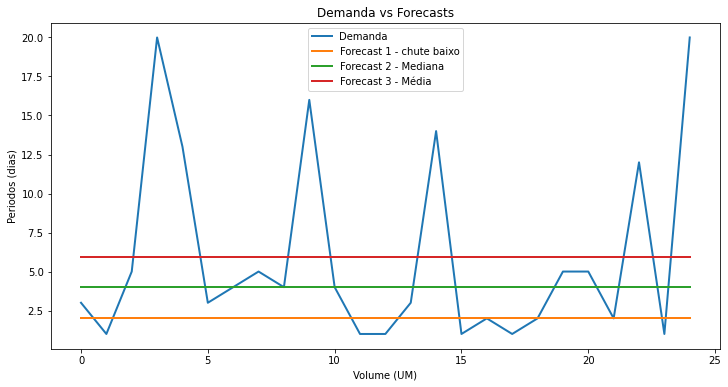

In [ ]:
#Gráfico com a demanda e os diferentes forecasts
ax = demanda_df.plot(lw=2,title='Demanda vs Forecasts', figsize=(12,6))
ax.set_xlabel("Volume (UM)")
ax.set_ylabel("Periodos (dias)")

In [ ]:
#@title

#Tomando as medidas para o forecast 1 - chute baixo
bias_1 = (demanda_df['Forecast 1 - chute baixo'] - demanda_df['Demanda'] ).mean()
RMSE_1 =  mean_squared_error(demanda_df['Demanda'],demanda_df['Forecast 1 - chute baixo']) 
MAE_1 = mean_absolute_error(demanda_df['Demanda'],demanda_df['Forecast 1 - chute baixo'])
MAPE_1 = mean_absolute_percentage_error(np.array(demanda_df['Demanda']),np.array(demanda_df['Forecast 1 - chute baixo']))
#Tomando as medidas para o forecast 2 - Mediana
bias_2 = (demanda_df['Forecast 2 - Mediana'] - demanda_df['Demanda'] ).mean()
RMSE_2 =  mean_squared_error(demanda_df['Demanda'],demanda_df['Forecast 2 - Mediana']) 
MAE_2 = mean_absolute_error(demanda_df['Demanda'],demanda_df['Forecast 2 - Mediana'])
MAPE_2 = mean_absolute_percentage_error(np.array(demanda_df['Demanda']),np.array(demanda_df['Forecast 2 - Mediana']))
#Tomando as medidas para o forecast 3 - Média
bias_3 = (demanda_df['Forecast 3 - Média'] - demanda_df['Demanda'] ).mean()
RMSE_3 =  mean_squared_error(demanda_df['Demanda'],demanda_df['Forecast 3 - Média']) 
MAE_3 = mean_absolute_error(demanda_df['Demanda'],demanda_df['Forecast 3 - Média'])
MAPE_3 = mean_absolute_percentage_error(np.array(demanda_df['Demanda']),np.array(demanda_df['Forecast 3 - Média']))


tabela_comparativa = pd.DataFrame({'Forecast 1':[bias_1,MAE_1, RMSE_1,MAPE_1],'Forecast 2':[bias_2,MAE_2,RMSE_2,MAPE_2],'Forecast 3':[bias_3,MAE_3,RMSE_3,MAPE_3]},index=['Bias','MAE','MSE','MAPE']).round(1)
tabela_comparativa['"Mais adequado para:"'] = np.abs(tabela_comparativa.T).idxmin(0)

tabela_comparativa

,Forecast 1,Forecast 2,Forecast 3,"""Mais adequado para:"""
Bias,-3.9,-1.9,-0.0,Forecast 3
MAE,4.4,4.1,4.8,Forecast 2
MSE,50.6,39.0,35.3,Forecast 3
MAPE,64.4,108.9,176.6,Forecast 1


In [ ]:
tabela_comparativa

A tabela comparativa não deixa dúvidas a respeito da natureza relativa dos KPIs mais utilizados. Por exemplo, o melhor resultado de MAPE se deu para o forecast 2, baseado na mediana. Já o melhor resultado de MSE se deu para o forecast 3, baseado na média. Então, afinal de contas, que modelo de forecast e qual KPI deve-se utilizar?

<br>

E principalmente, **por que um forecast baseado na média obteve um melhor MSE e um forecast baseado em mediana um melhor MAE?**

Para isso, precisamos entender o que otimiza estes KPIs. Um instrumento matemático utilizado para tirar conclusões a respeito é a derivada. [Mais sobre derivada aqui](https://pt.wikipedia.org/wiki/Derivada_parcial)

Não se preocupe caso não esteja familiarizado com cálculo, dê uma atenção especial a conclusão.

---

### Mediana vs Média - Otimização

<br>

#### MSE

Vamos otimizar o MSE. Conseguimos a otimização de uma função quando a derivada desta função é igual a zero. Vamos derivar parcialmente em $f_t$ pois gostaríamos de saber qual modelo de forecast devemos perseguir para obter o MSE ótimo.

<br>

$$ \frac{\partial MSE}{\partial f} = \frac{ \partial \frac{1}{n} \sum{}{(f_t-d_t)}^2  }{\partial f } = 0$$ 

Utilizando regra da cadeia e da potência:   


$$ \frac{2}{n} \sum (f_t-d_t) = 0$$

Portanto: 
$$ \sum f_t = \sum d_t $$

E para deixar mais claro e sem prejuízo a equação:

$$ \frac{\sum f_t}{n} = \frac{\sum d_t}{n} $$

**Conclusão**: Para otimizar o forecast do MSE, o modelo deve ter a soma dos forecasts mais próxima possível da soma das demandas, ou seja, não importa se erramos muito pra cima ou pra baixo, desde que a soma dos erros se aproxime de zero. Isto te lembra algo? Se trata de um modelo que persegue um resultado sem viés (unbiased).O que importa é a média. O MSE premia forecasts baseados em média.

<br>

---
#### MAE

Vamos repetir o exercício para o MAE

$$ \frac{\partial MAE}{\partial f} = \frac{ \partial \frac{1}{n} \sum{}{|(f_t-d_t)|}  }{\partial f } = 0$$ 

<br>

Sabendo que a função modular é indefinida em seu pico e que $1/n$ e o somatório "saem" da derivada:

<br>

\begin{equation}
  |f_t - d_t| =
    \begin{cases}
      f_t - d_t & \text{d_t < f_t}\\
      indefinido & \text{f_t = d_t}\\
      d_t - f_t & \text{f_t > d_t}
    \end{cases}       
\end{equation}

e,

\begin{equation}
  \frac {\partial |f_t - d_t|}{\partial f}  =
    \begin{cases}
      1 & \text{d_t < f_t}\\
      indefinido & \text{f_t = d_t}\\
      -1 & \text{f_t > d_t}
    \end{cases}       
\end{equation}

Finalmente temos:



\begin{equation}
  \frac{\partial MAE}{\partial f}  = \frac{1}{n} \sum
    \begin{cases}
      1 & \text{d_t < f_t}\\
      -1 & \text{f_t > d_t}
    \end{cases}    
    = 0   
\end{equation}

**Conclusão:** Observe que para que o resultado deste somatório seja igual a zero precisamos garantir que tenhamos tantos números 1 somando quanto números -1. Portanto, temos que ter $n/2$ casos em que $d_t < f_t$ e $n/2$ casos em que ocorre o inverso. Mas, isto lembra a definição de mediana, certo? Neste caso não importa se temos erros gigantescos (tanto negativos quanto positivos), o que importa é que haja um equilíbrio. Temos 10 erros pra cima de um lado? então, caso tenhamos também, 10 erros pra baixo, teremos um forecast premiado pelo KPI MAE. O valor que separa a serie temporal em 2 partes iguais é justamente a mediana, o MAE será otimizado caso o modelo de forecast acerte o valor da mediana.

---

#### MAPE

No forecast 1 chutamos um valor muito baixo propositalmente. A tabela comparativa mostra que o MAPE premiou o forecast muito abaixo da demanda média e da mediana. A derivação do MAPE não traz grandes insights. Por hora sabemos que irá premiar forecasts abaixo do ideal e irá alocar grande peso aos erros durante períodos de baixa demanda, o que promoverá resultados não desejáveis, talvez em qualquer situação. Apenas devemos evitar o MAPE no contexto de supply chain.

---


#### MAE ou RMSE/MSE - Qual escolher?

Ok, agora vamos aos entendimentos finais. Agora já sabemos que tipos de modelos de forecast possuem implicação direta no MAE, no MAPE e no RMSE. Descobrimos que estes KPIs podem discordar sobre o que é um forecast preciso ou não. Também descobrimos que os KPIs respondem de maneira diferente aos erros, alguns dão mais importância aos grandes erros, e não só isso, os resultados dos KPIs pioram ou melhoram desproporcionalmente. 


Para avaliar uma decisão sobre o MAE e o RMSE devemos nos preocupar com 3 diretrizes importantes: viés (bias), sensibilidade a outliers e intermitência 

<br>

#### Viés (Bias)

Para muitos materiais observamos que só teremos picos de demanda quando ocorrem promoções, pedidos excessivos da ponta. Portanto, os eventos mais próximos da cauda superior de uma distribuição de probabilidade são mais raros. Como consequência, a distribuição de probabilidade é positivamente inclinada, matematicamente, $média > mediana$. Se temos uma grande quantidade de demandas pequenas a mediana tende a se deslocar para a esquerda, tende a conter viés. Um modelo de forecast que tenta minimizar o MAE irá produzir Bias. Enquanto um modelo de forecast que está minimizando o RMSE não irá (uma vez que terá como alvo a média, não a mediana enviesada). 

Esta é a principal fraqueza do MAE e que devemos adicionar ao nosso escopo de decisão. Quais materiais do seu estoque tendem a ter esta distribuição? Qual KPI está utilizando para eles?

<br>

<p align='center'> 
<img src="https://www.researchgate.net/profile/Adam-Scouse-2/publication/327777206/figure/fig3/AS:672968430600198@1537459585450/Right-skewed-distribution-representing-greenhouse-gas-emission-price-variability.ppm" width="60%"></p>



#### Sensibilidade a outliers

Como conversado anteriormente e demonstrado, o RMSE dá maior importância aos grandes erros. Caso isto seja desejável para você, saiba que há um custo: o RMSE é sensível a outliers.

<br>

Vamos trazer outro exemplo em Python para ilustrar:

In [ ]:
#@title

#Exemplo de demanda 1
demanda = pd.Series([20,11,13,16,15,14,17,15,9,12,11,13,30,28,15])
#Exemplo de demanda 2
demanda2 = pd.Series([20,11,13,16,15,14,17,15,9,12,11,13,30,28,200])

In [ ]:
#@title

#montando tabela
df = pd.DataFrame([demanda,demanda2],index=['Demanda','Demanda com outlier'])
df['Média'] = df.mean(1)
df['Mediana'] = df.iloc[:,:-1].median(1)

In [ ]:
#mostrando resultados com uma casa decimal
df.round(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Média,Mediana
Demanda,20,11,13,16,15,14,17,15,9,12,11,13,30,28,15,15.9,15.0
Demanda com outlier,20,11,13,16,15,14,17,15,9,12,11,13,30,28,200,28.3,15.0


A mediana da primeira demanda é 15,0 , enquanto temos média 15,9. Já observamos que caso usemos um modelo de forecast que minimiza MAE, iremos obter um forecast igual a mediana 15,0. Portanto, como efeito colateral, teríamos um $bias = -0,9$. Caso julgue interessante evitar isto, pode-se usar um modelo que minimize o RMSE, mirando na média 15,9. Para entender o $bias$, lembre-se de sua equação.

<br>

No caso da demanda 2, temos um outlier igual a 200. Perceba que a mediana permanece 15,0. Nesse caso, talvez você não queira utilizar um forecast com base na média, tal atitude poderia causar um ***overstock*** a curto prazo. Certamente valeria a pena avaliar se seria mais interessante utilizar um modelo que minimize o MAE. 

<br>

Em supply chain, promoções, marketing, picos de demanda e acordos pontuais podem gerar tais outliers. Você pretende deixar seu forecast sensível a esses tipos de variação? Há casos em que isto pode ser útil, como veremos a seguir. 

---

#### Demanda intermitente

<br>

Há um tipo de situação em que a mediana pode trazer resultados indesejáveis. Imagine que a cada 3 semanas você precise atender a uma solicitação de 100 unidades. Portanto teríamos uma média de 33 e mediana de 0. Pois um dos zeros dividiria a série em duas partes do mesmo tamanho. Para minimizar um MAE teríamos que utilizar como forecast o número 0. Poderíamos obter bons resultados a partir disto? Claro que não. Certamente ocorrería um ***shortage*** a curto prazo. 

<br>

Nesse caso, minimizar o RMSE seria uma boa opção.

| Semana  | Demanda  | Forecast | $Error$  | $Error^2$     |   
|---|---|---|---|---|
| 1  | 100  | 33  | 67  | 4445  
|  2 | 0  | 33  | -33 | 1111 
| 3  | 0  |  33 |  -33 | 1111  

<br>
<br>

| Semana  | Demanda  | Forecast | $Error$  | $Error^2$     |   
|---|---|---|---|---|
| 1  | 100  | 0  | -100 | 10000  
|  2 | 0  | 0  | 0 | 0
| 3  | 0  |  0 |  0 | 0  

---

## Conclusão

<br>

O MAE oferece uma proteção contra outliers enquanto o RMSE fornece a garantia de obter um forecast sem viés. Se você está utilizando o MAE junto a um alto bias, isto pode significar que seja mais adequado utilizar o RMSE. Porém, se o seu estoque está recheado de outliers, resultando em uma distribuição positivamente inclinada, talvez seja mais interessante utilizar o MAE. De repente, utilizar os dois KPIs pode melhorar o seu modelo de medição.

Outra dica importante é aumentar o horizonte da série. Por exemplo, caso o material tenha uma baixa demanda a nível semanal, considere um período mensal ou trimestral. Esta técnica tende a suavizar também os outliers. Te dando mais liberdade para usar o MAE como KPI, uma vez que dispensamos o RMSE como solucionador dos problemas relativos aos outliers.

Agora você já sabe porque não existe fórmula mágica. A experimentação e o estudo da característica do seu estoque são suas principais armas para definir qual KPI utilizar, e mais importante, te permitirá interpretar os resultados e utilizá-los a seu favor.

